<a href="https://colab.research.google.com/github/ajulissa/CovidPredict/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#df006 = pd.read_csv("covidTested_v006.csv")
#df006

In [21]:
df0083 = pd.read_csv('/content/gdrive/MyDrive/Datasets/covidTested_v0083.csv')
df0083

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [ ]:
#df006['corona_result'].value_counts()

In [22]:
df0083['resultado'].value_counts()

negative    2480403
positive     220975
other         41218
Name: resultado, dtype: int64

In [23]:
df0083['sesenta_mas'].value_counts()

No     1908553
Yes     286399
Name: sesenta_mas, dtype: int64

In [24]:
df0083.isnull().sum() 

fecha                            0
tos                              0
fiebre                           0
dolor_de_garganta                0
dificultad_para_respirar         0
dolor_de_cabeza                  0
resultado                        0
sesenta_mas                 547644
sexo                         92886
indicaciones                     0
dtype: int64

In [25]:
data = df0083.dropna()
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [26]:
data['resultado'].value_counts()

negative    1943172
positive     208726
other         34329
Name: resultado, dtype: int64

In [27]:
data = data.drop(data[data["resultado"].str.contains("other")].index)
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [28]:
data['resultado'].value_counts()

negative    1943172
positive     208726
Name: resultado, dtype: int64

In [29]:
data['indicaciones'].value_counts()

Other                     1988259
Contact with confirmed     147809
Abroad                      15830
Name: indicaciones, dtype: int64

contact = 3

abroad = 1

other = 0

In [30]:
data.resultado.replace({"positive": 1, "negative": 0}, inplace = True)
data.sesenta_mas.replace({"Yes": 1, "No": 0}, inplace = True)
data.sexo.replace({"male": 1, "female": 0}, inplace = True)
data.indicaciones.replace({"Contact with confirmed": 3, "Abroad": 1, "Other": 0}, inplace = True)
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,0,0,1,0
1,2020-11-12,0,1,0,0,0,0,0,1,0
2,2020-11-12,0,0,0,0,0,0,1,0,0
3,2020-11-12,0,0,0,0,0,0,0,1,0
4,2020-11-12,0,1,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,1,0,0,3
2731640,2020-03-20,0,0,0,0,0,0,0,0,0
2731643,2020-03-20,1,0,0,0,0,0,0,1,3
2731644,2020-03-20,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
X = data.drop(["resultado", "fecha"],axis = 1)
y = data.resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter = 10000, tol=0.005) #lr=0.0001

In [33]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.005, verbose=0,
                   warm_start=False)

In [34]:
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

[[0.45505016 1.61528999 1.3375669  1.5867187  1.94236112 0.14216122
  0.2009124  0.93002041]]
[-3.13199468]


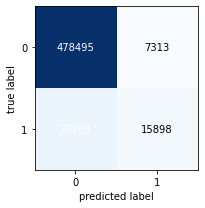

In [35]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = logisticRegr.predict(X_test)
matriz = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(3,3), show_normed=False)
plt.tight_layout()

In [37]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.42182069038711556